In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/ kattur_test1.csv')

FileNotFoundError: ignored

In [ ]:
print(df.dtypes)

company_uid              object
date_of_registration     object
month_name               object
state                    object
roc                      object
category                 object
class                    object
company_type             object
authorized_capital      float64
paidup_capital          float64
activity_code           float64
activity_description     object
dtype: object


In [ ]:
df.isna().sum()

company_uid             0
date_of_registration    0
month_name              0
state                   0
roc                     0
category                0
class                   0
company_type            0
authorized_capital      0
paidup_capital          0
activity_code           0
activity_description    0
dtype: int64

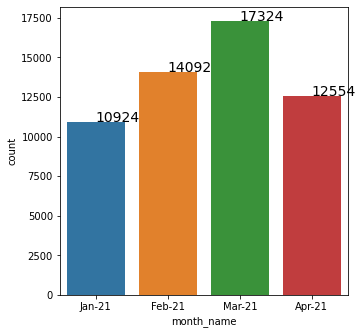

In [ ]:
ax=plt.figure(figsize=(4,4)).add_axes([0,0,1,1])
sns.countplot(x=df["month_name"])
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%i"% rect.get_height()
             ,fontsize=14 )

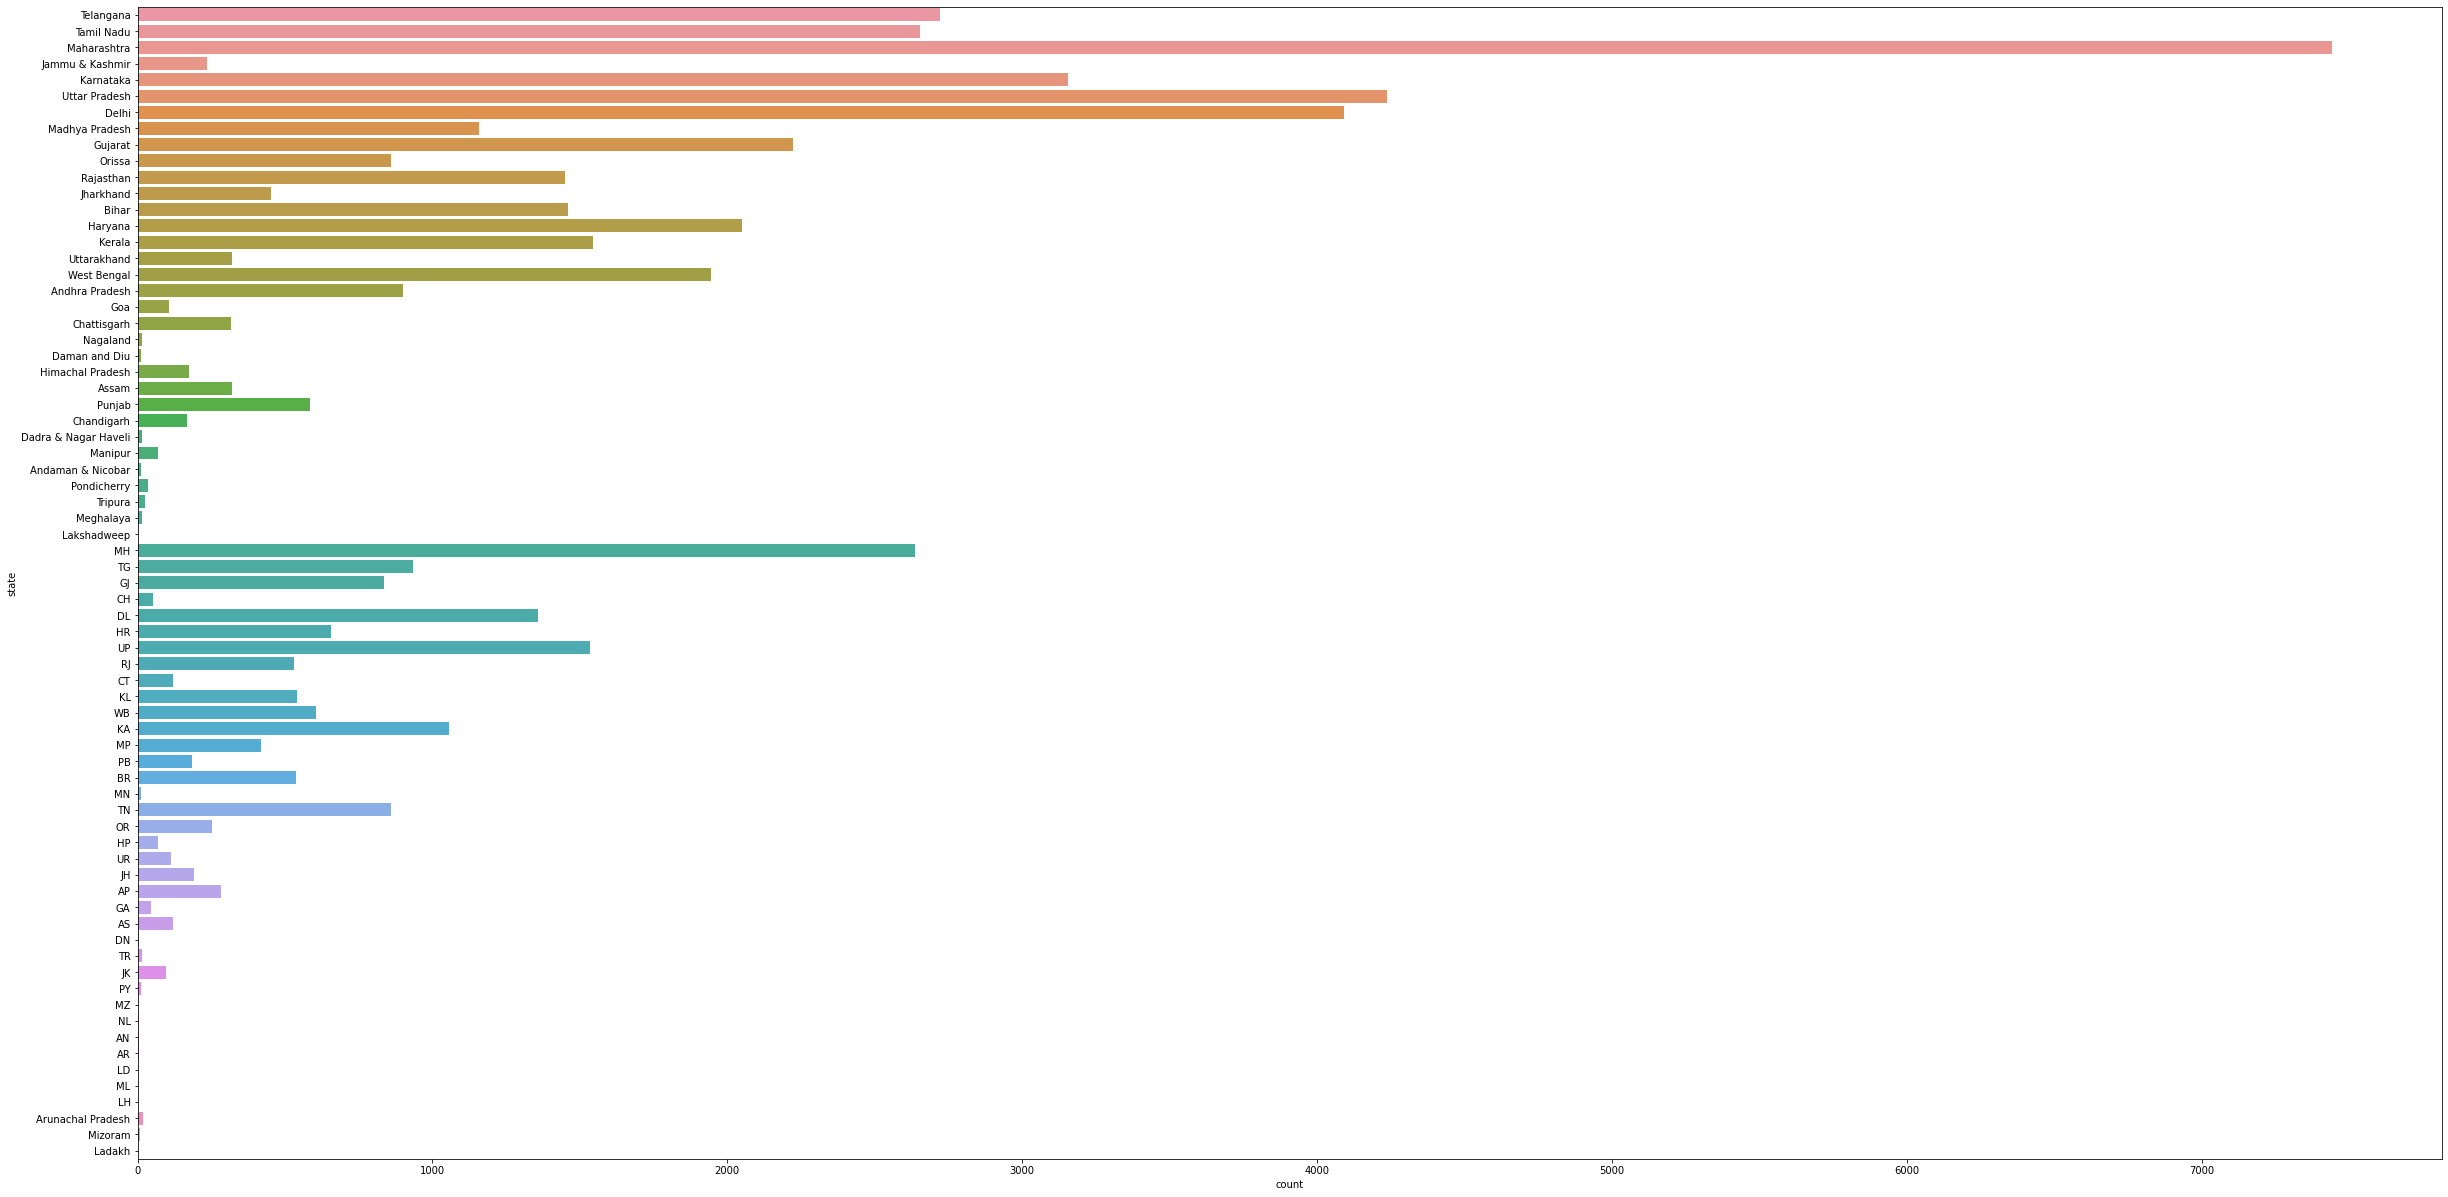

In [ ]:
ax=plt.figure(figsize=(32,16)).add_axes([0,0,1,1])
sns.countplot(y=df["state"])



In [ ]:
states={ 'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Ladakh'
,'DD': 'Daman and Diu'}

In [ ]:
df.replace({'state':states},inplace = True)

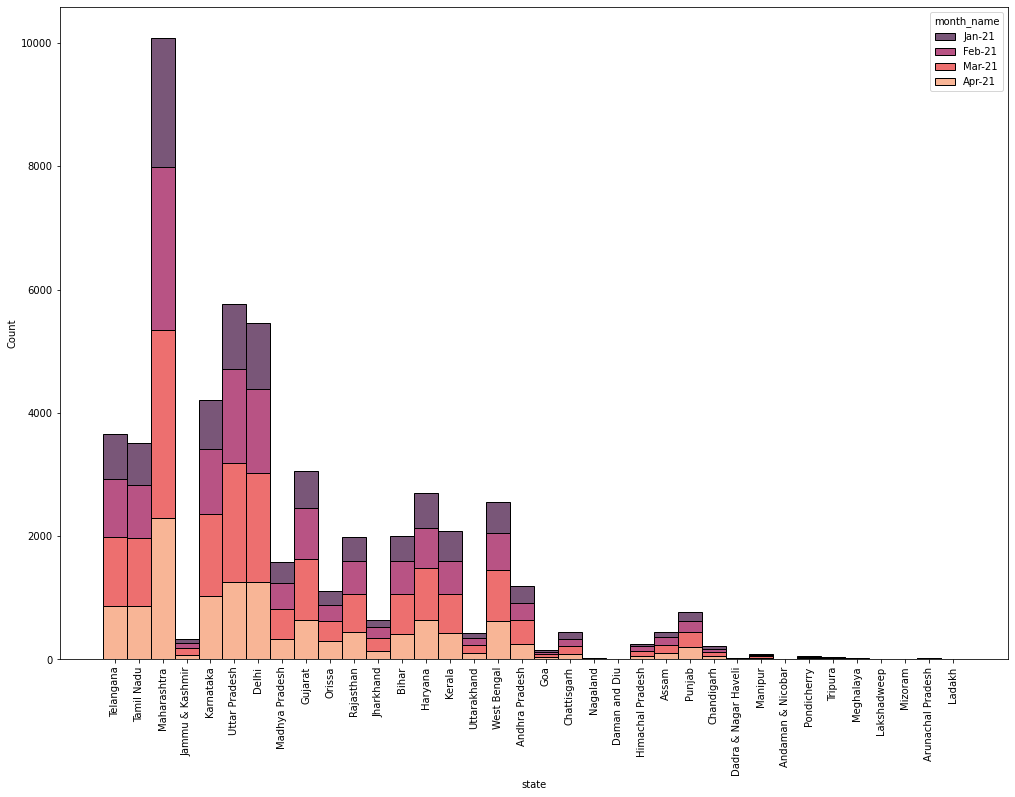

In [ ]:
plt.figure(figsize=(17,12))
sns.histplot(data=df, x="state", hue="month_name", multiple="stack",palette="rocket")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
state_count=pd.DataFrame(df['state'].groupby
                              (df['state'].iloc[:]).count())
state_count.rename(columns={"state":"count"},inplace=True)
state_count.sort_values('count',ascending=False,inplace=True)
state_count.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(17,12))
sns.histplot(x='state',data=state_count,hue='month_name')
plt.xticks(rotation = 90)
plt.show()

NameError: ignored

<Figure size 1224x864 with 0 Axes>

In [ ]:
activity_count=pd.DataFrame(df['activity_description'].groupby
                              (df['activity_description'].iloc[:]).count())
activity_count.rename(columns={"activity_description":"actcount"},inplace=True)
activity_count.sort_values('actcount',ascending=False,inplace=True)
activity_count.reset_index(inplace=True)

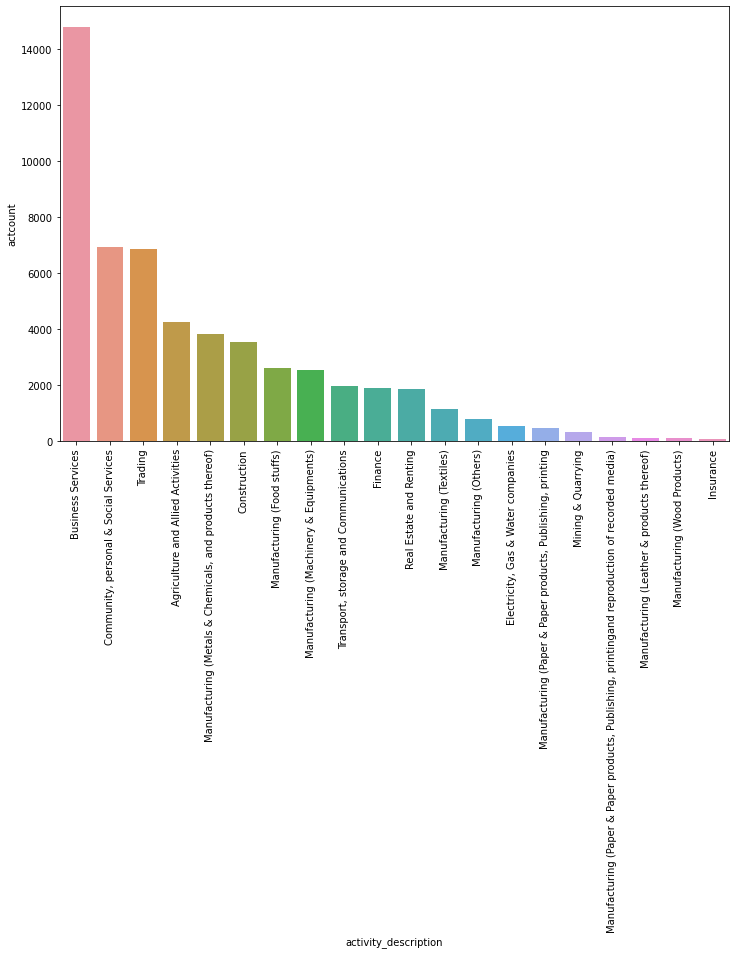

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='activity_description',y='actcount',data=activity_count)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
companies_activity=df.pivot_table(index='activity_description',values=['paidup_capital','authorized_capital'])
companies_activity.reset_index(inplace=True)
companies_activity.head()

,activity_description,authorized_capital,paidup_capital
0,Agriculture and Allied Activities,9.880544e+05,224200.422175
1,Business Services,1.037370e+06,398518.173252
2,"Community, personal & Social Services",7.887027e+05,269909.532507
3,Construction,1.206601e+06,588799.865131
4,"Electricity, Gas & Water companies",1.977200e+07,882609.216364


In [ ]:
pl=companies_activity.melt('activity_description', var_name='capital',  value_name='value')
pl.head()

,activity_description,capital,value
0,Agriculture and Allied Activities,authorized_capital,9.880544e+05
1,Business Services,authorized_capital,1.037370e+06
2,"Community, personal & Social Services",authorized_capital,7.887027e+05
3,Construction,authorized_capital,1.206601e+06
4,"Electricity, Gas & Water companies",authorized_capital,1.977200e+07


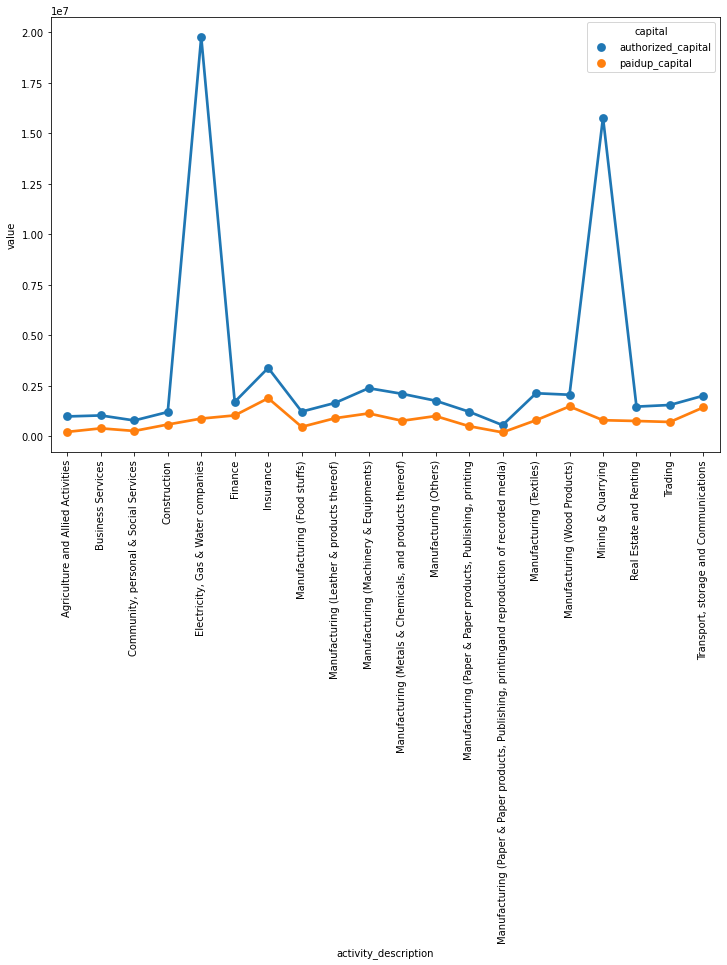

In [ ]:
plt.figure(figsize=(12,8))
sns.pointplot(x="activity_description", y="value", hue='capital', data=pl)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
companies_state=df.pivot_table(index='state',values=['paidup_capital','authorized_capital'])
companies_state.reset_index(inplace=True)
ab=companies_state.melt('state', var_name='capital',  value_name='value')
print(ab)

                state             capital         value
0   Andaman & Nicobar  authorized_capital  5.540000e+05
1      Andhra Pradesh  authorized_capital  8.352973e+05
2   Arunachal Pradesh  authorized_capital  7.782609e+05
3               Assam  authorized_capital  1.292843e+06
4               Bihar  authorized_capital  7.654106e+05
..                ...                 ...           ...
67          Telangana      paidup_capital  7.889321e+05
68            Tripura      paidup_capital  6.861795e+05
69      Uttar Pradesh      paidup_capital  2.944433e+05
70        Uttarakhand      paidup_capital  1.411931e+06
71        West Bengal      paidup_capital  4.545356e+05

[72 rows x 3 columns]


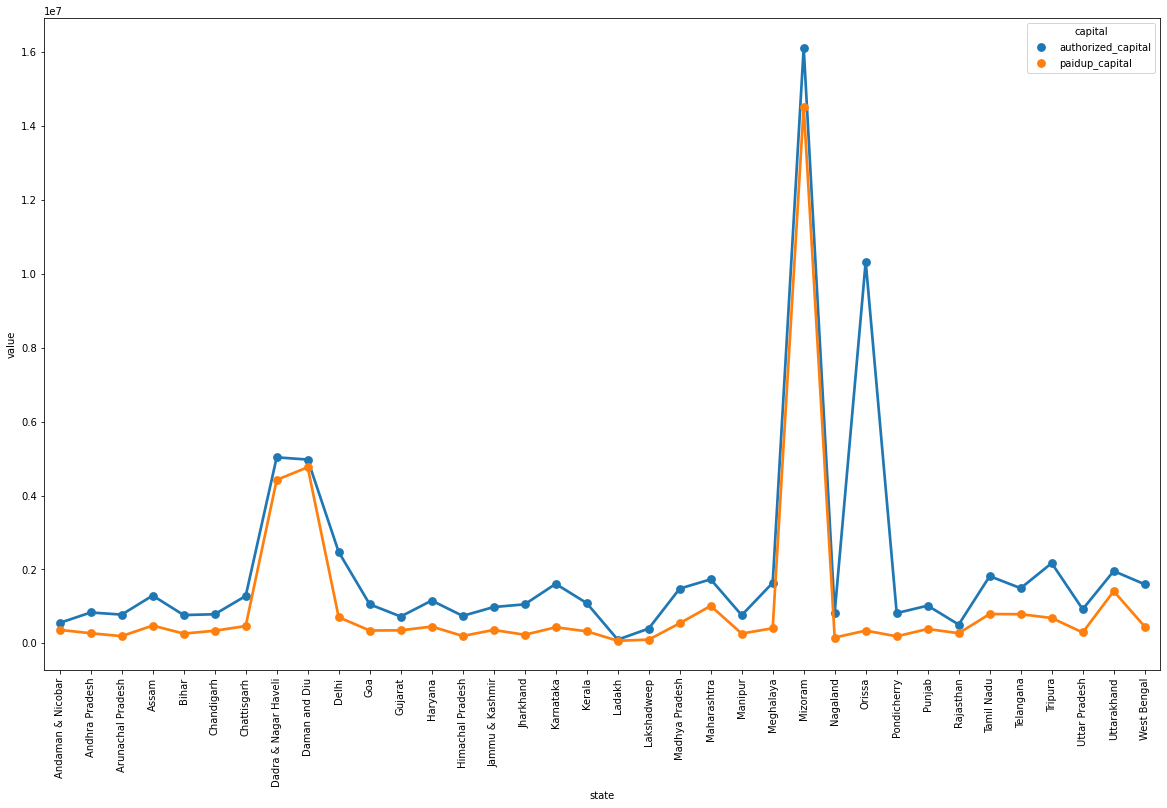

In [ ]:
plt.figure(figsize=(20,12))
sns.pointplot(x="state", y="value", hue='capital', data=ab)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
states={ 'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Ladakh'
,'DD': 'Daman and Diu'}

In [ ]:
df.replace({'state':states},inplace = True)

In [ ]:
companies_activity=df.pivot_table(index='state',columns=['activity_description'], aggfunc=lambda x: len(x) )
companies_activity.reset_index(inplace=True)
print(companies_activity)

                                     state                     activity_code  \
activity_description                       Agriculture and Allied Activities   
0                        Andaman & Nicobar                               NaN   
1                           Andhra Pradesh                             120.0   
2                        Arunachal Pradesh                               5.0   
3                                    Assam                              79.0   
4                                    Bihar                             182.0   
5                               Chandigarh                               1.0   
6                              Chattisgarh                              31.0   
7                     Dadra & Nagar Haveli                               1.0   
8                            Daman and Diu                               NaN   
9                                    Delhi                              83.0   
10                                     G

# Maharashtra has a large number of agricultural startups

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Agriculture and Allied Activities']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


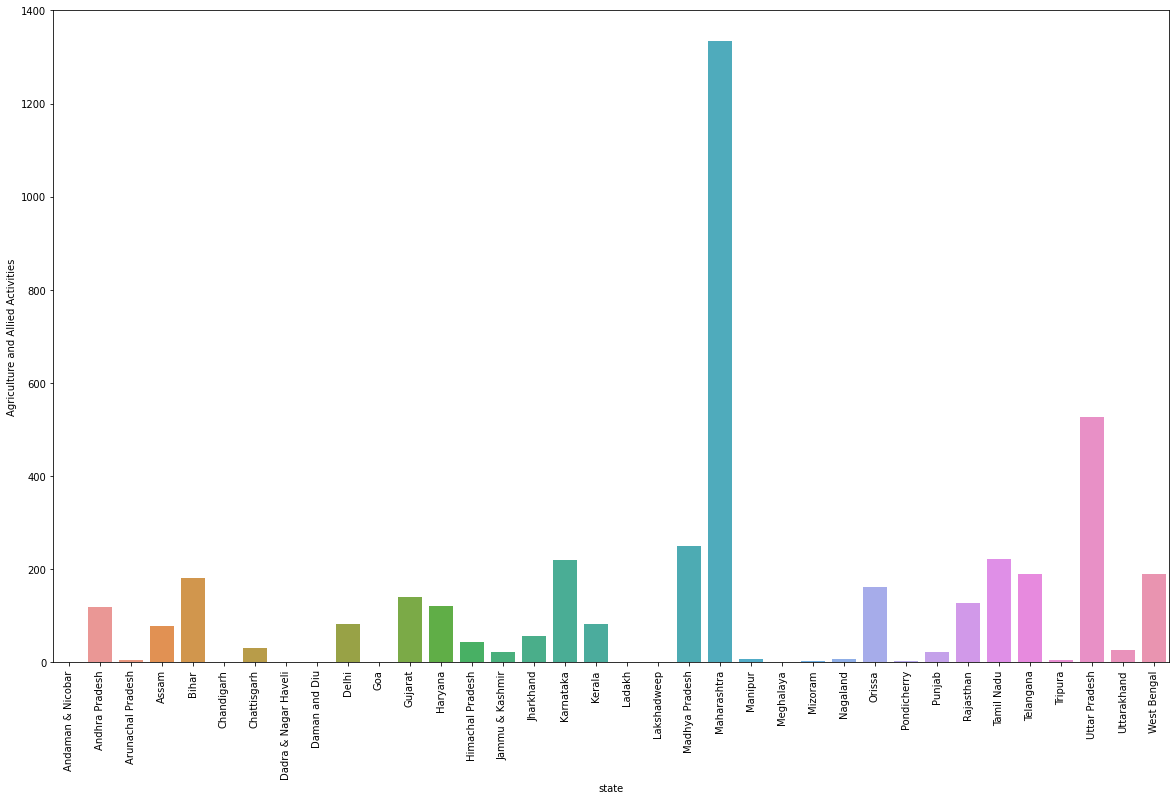

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs business services

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


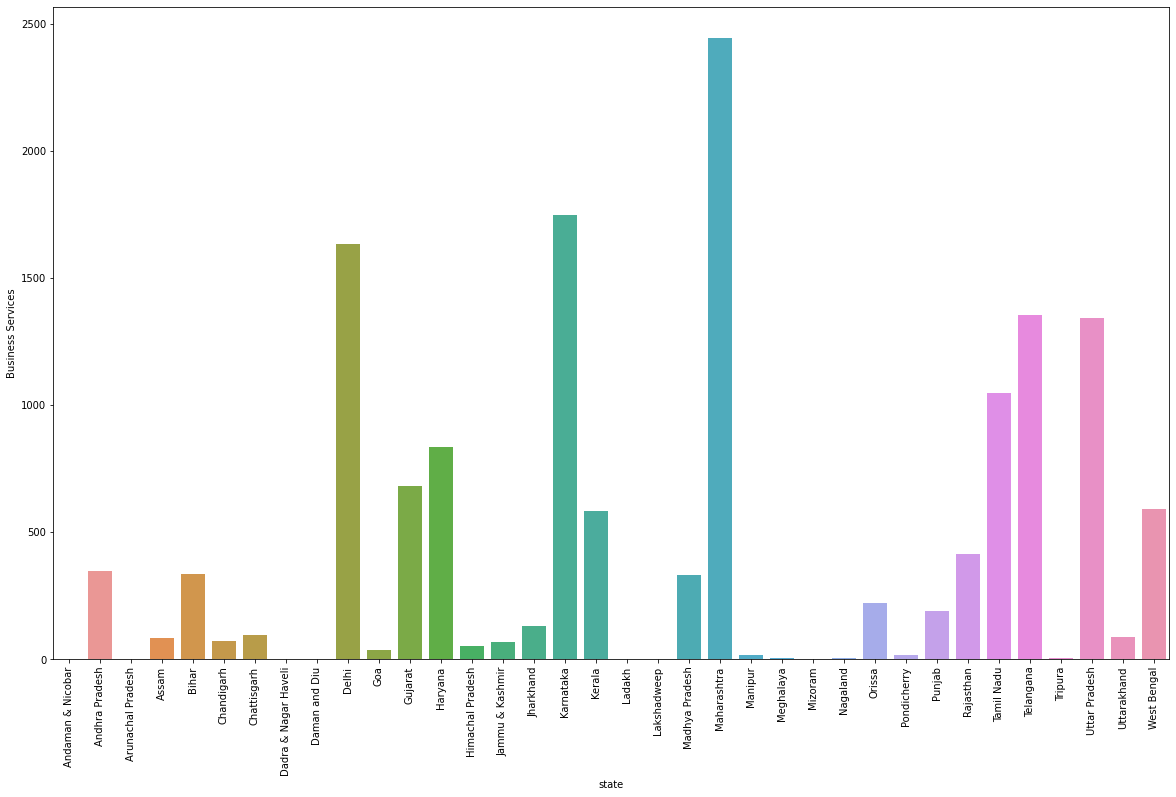

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Business Services']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs Community, personal & Social Services

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


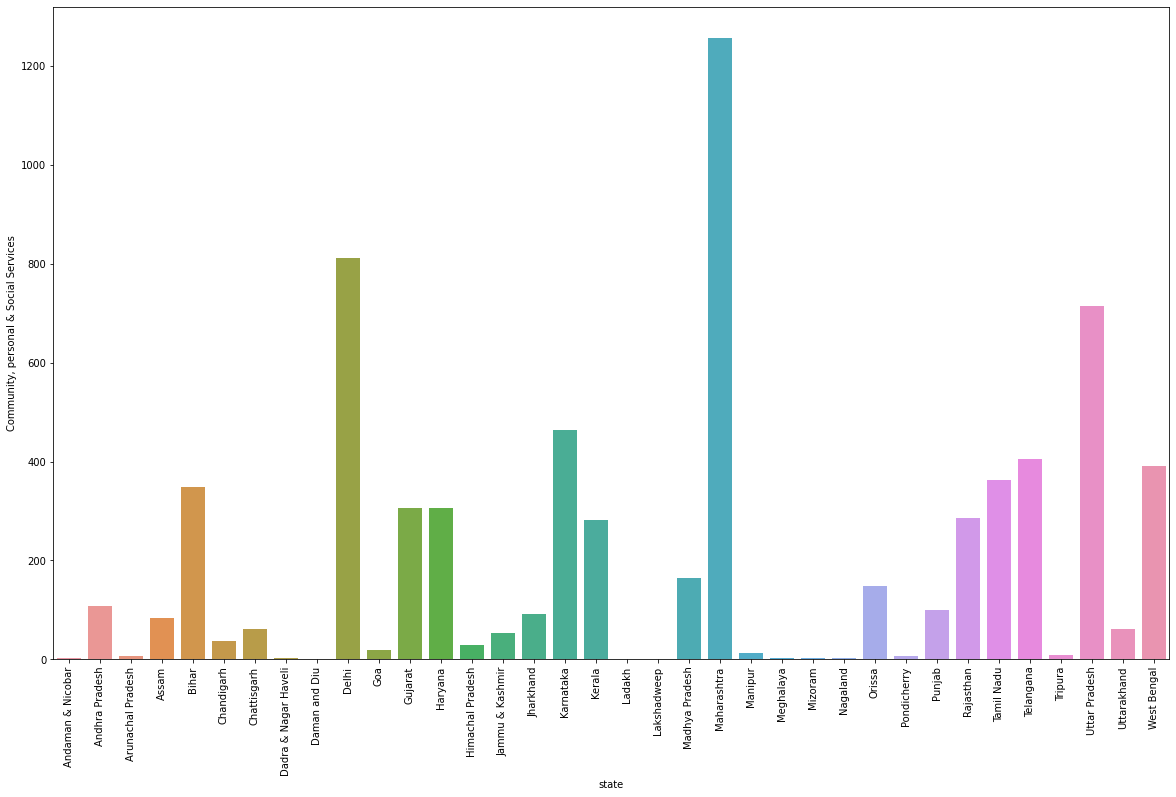

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Community, personal & Social Services']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs Construction





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


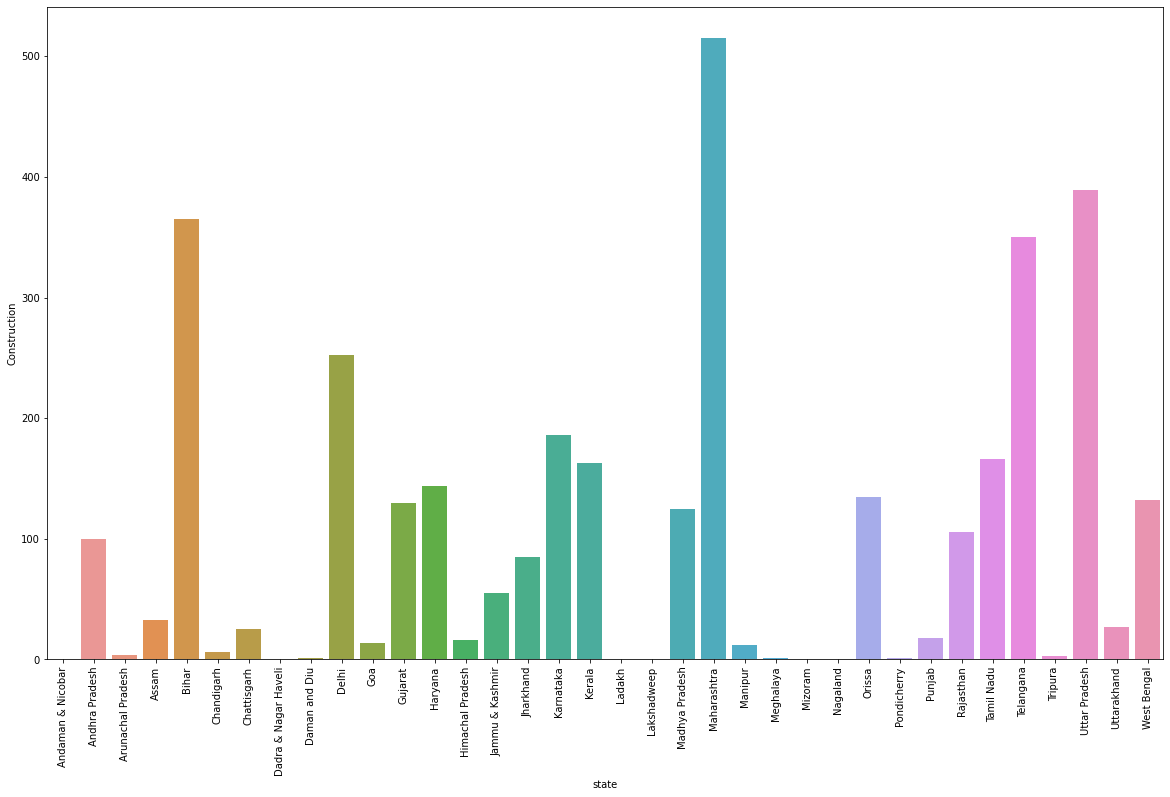

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Construction']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs Electricity, Gas & Water companies

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


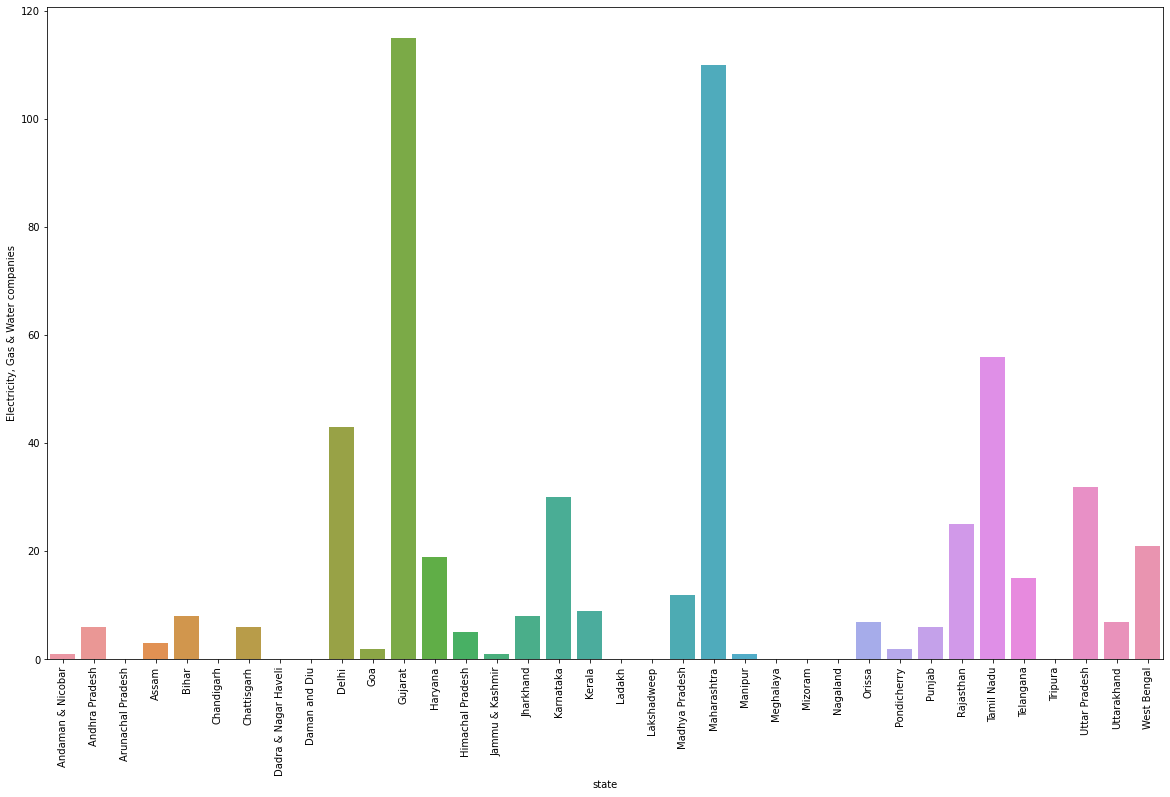

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Electricity, Gas & Water companies']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs Manufacturing (Food stuffs)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


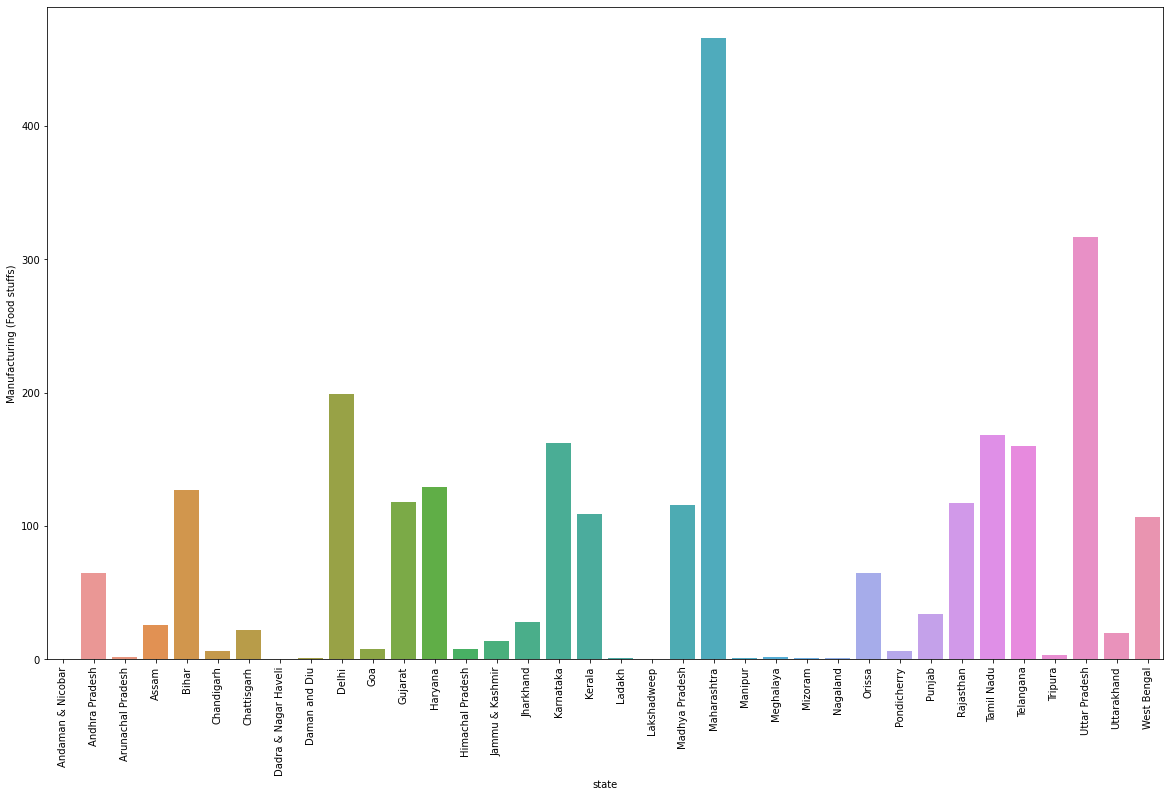

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Food stuffs)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

# state vs Manufacturing (Leather & products thereof)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


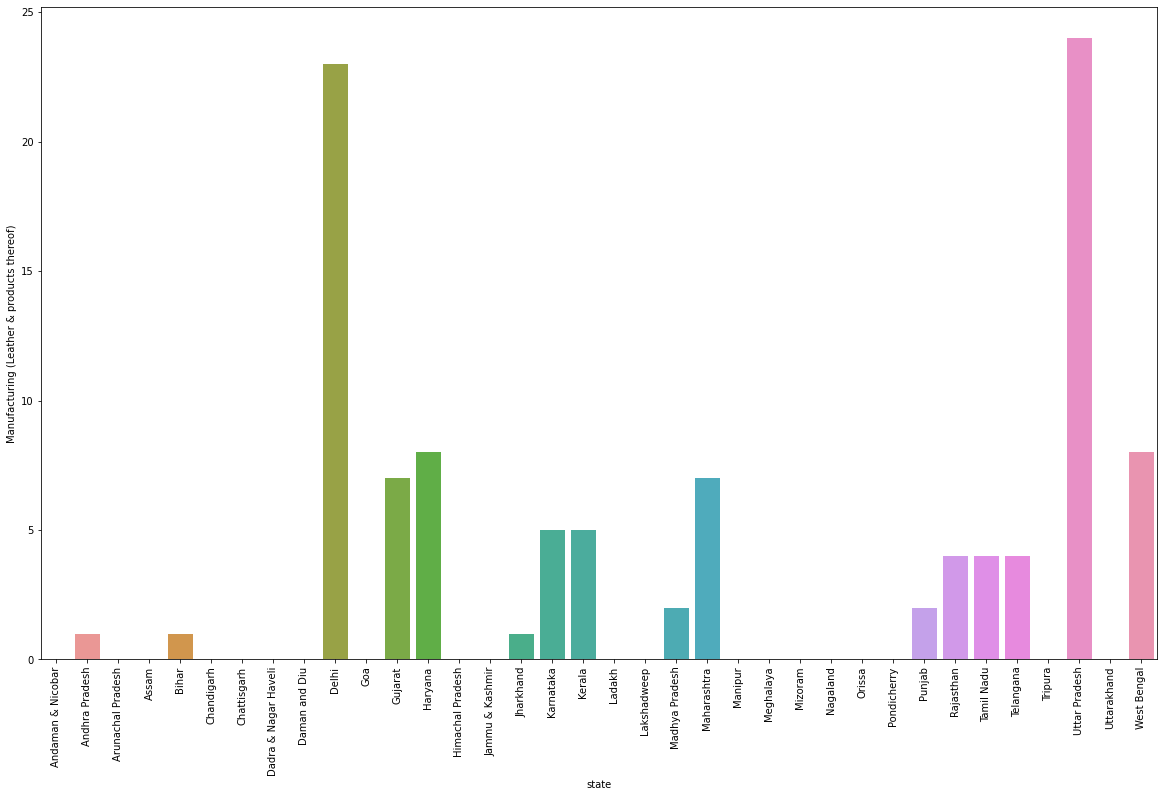

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Leather & products thereof)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

state vs Finance

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


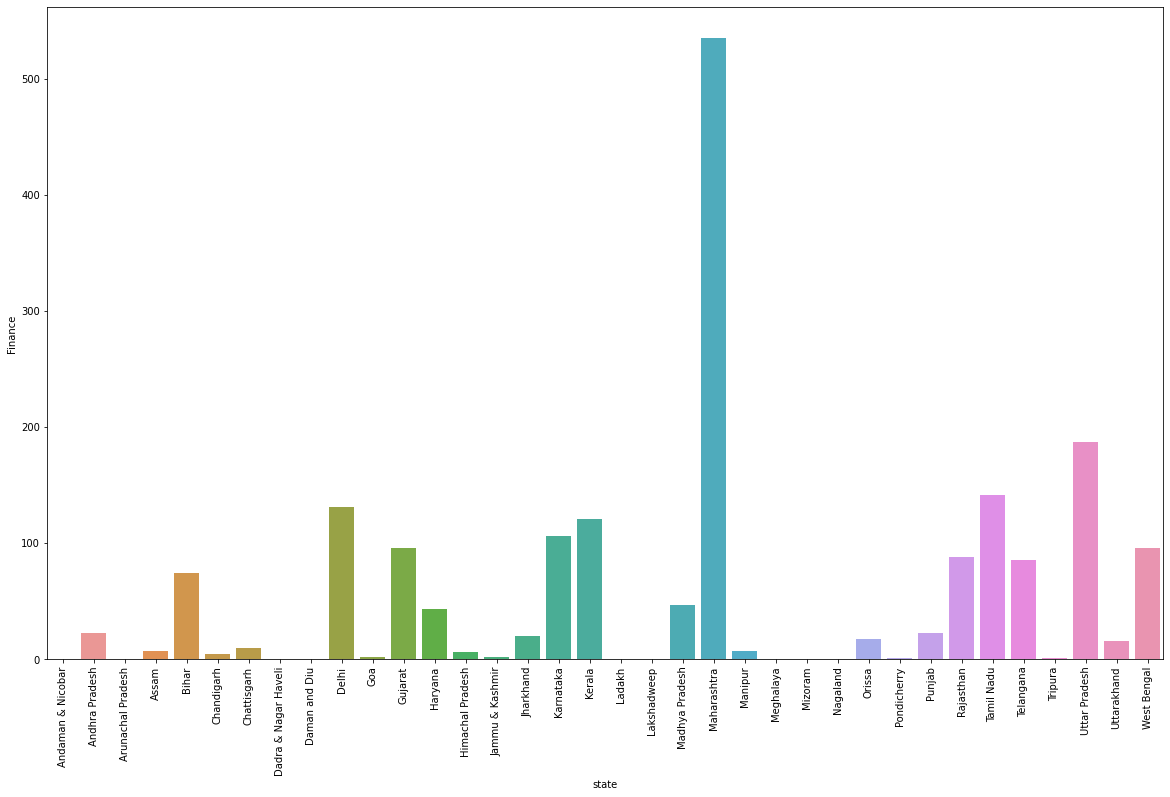

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Finance']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


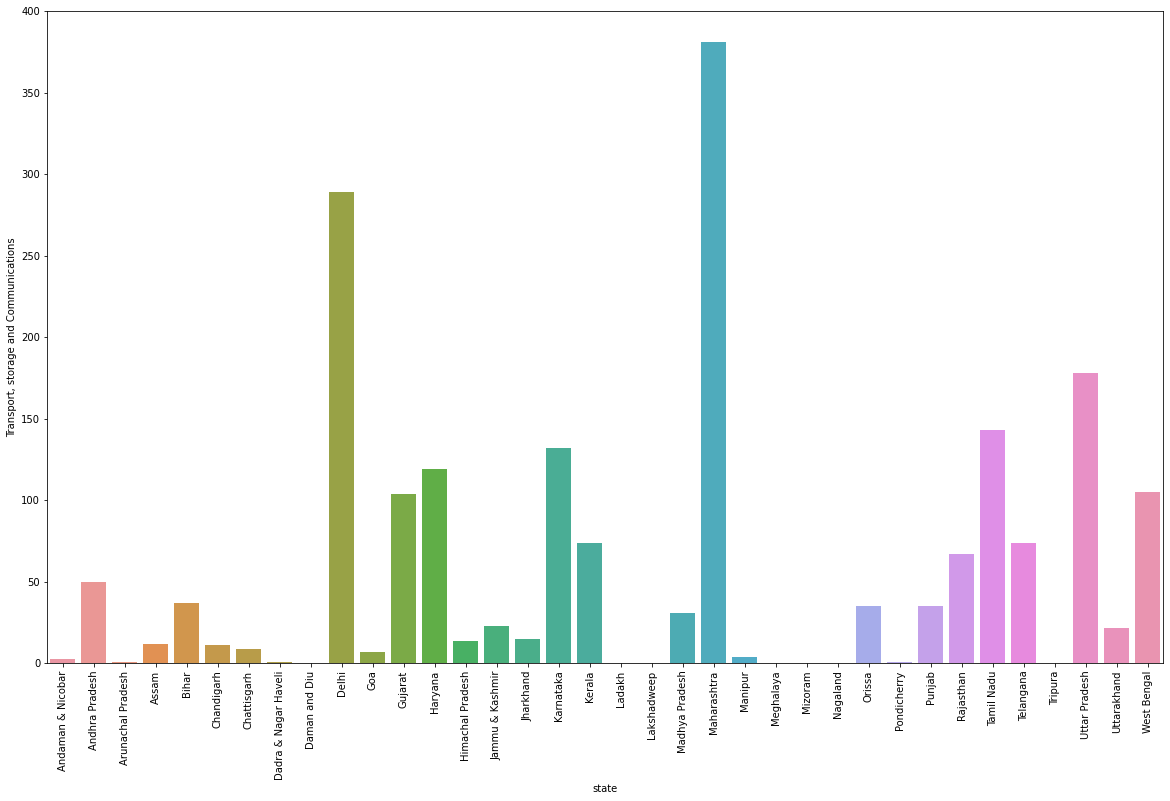

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Transport, storage and Communications']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


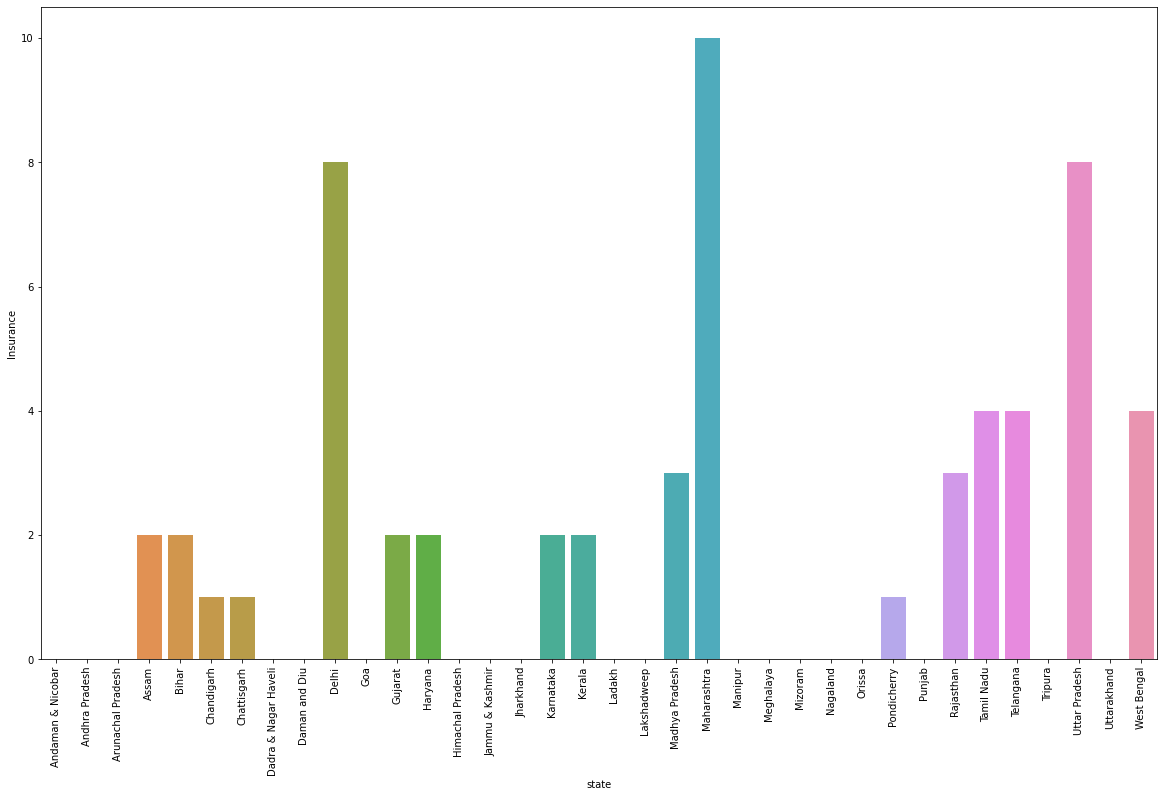

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Insurance']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


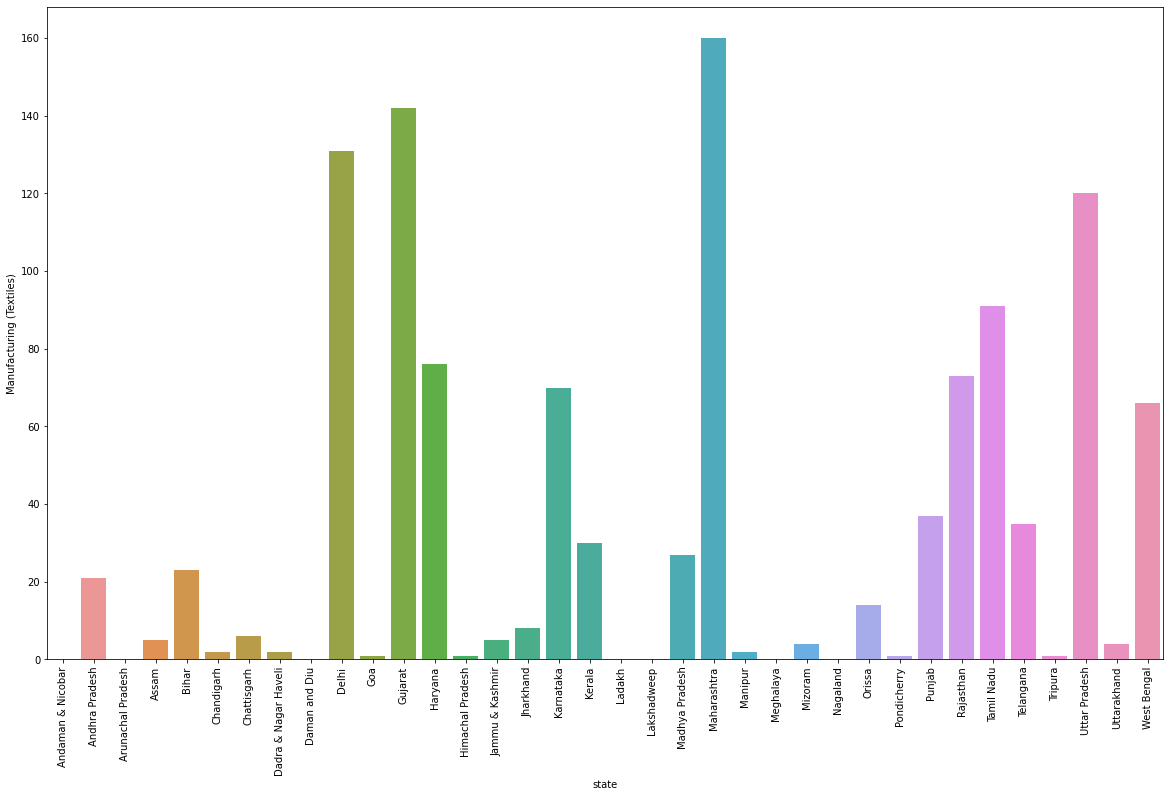

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Textiles)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


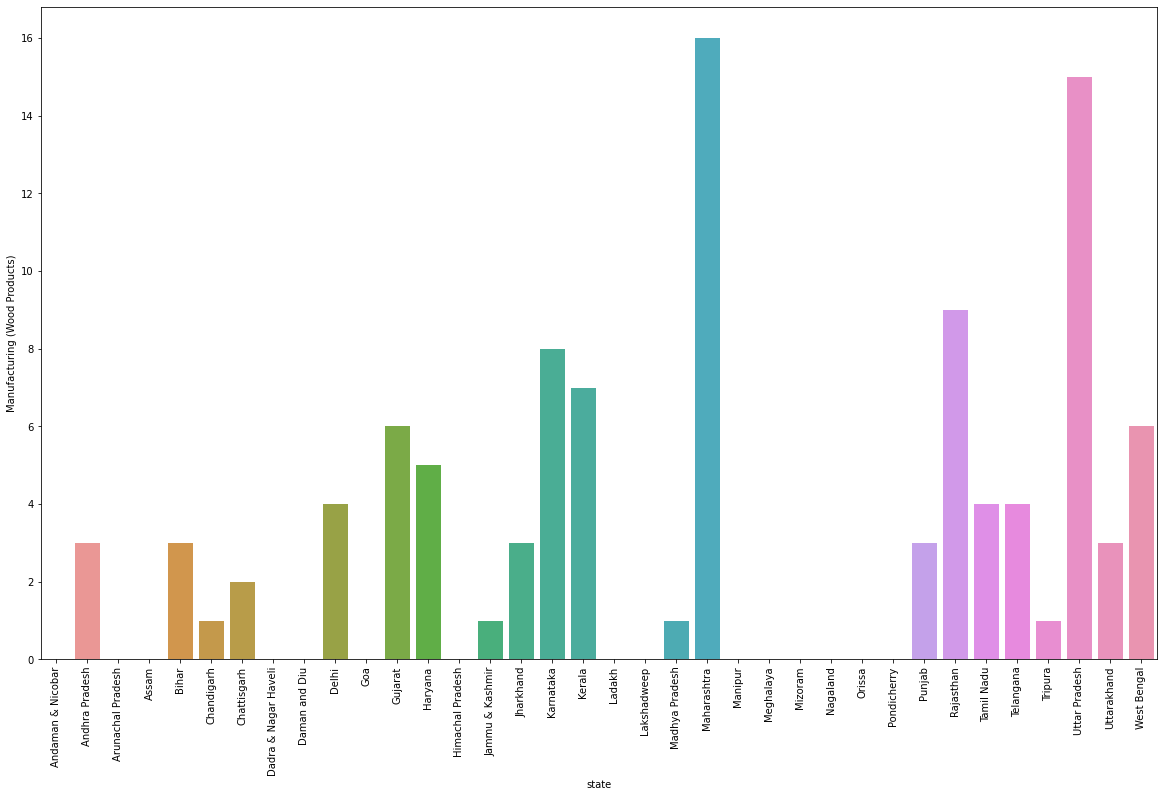

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Wood Products)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


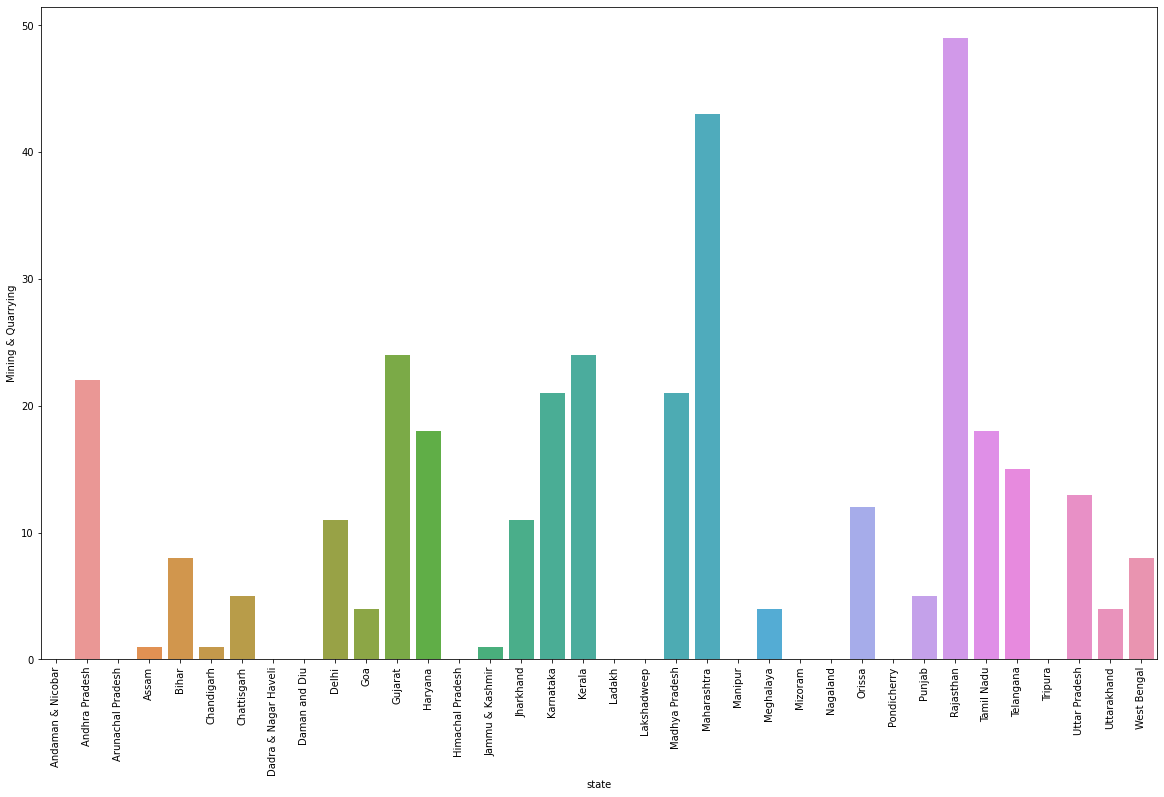

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Mining & Quarrying']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


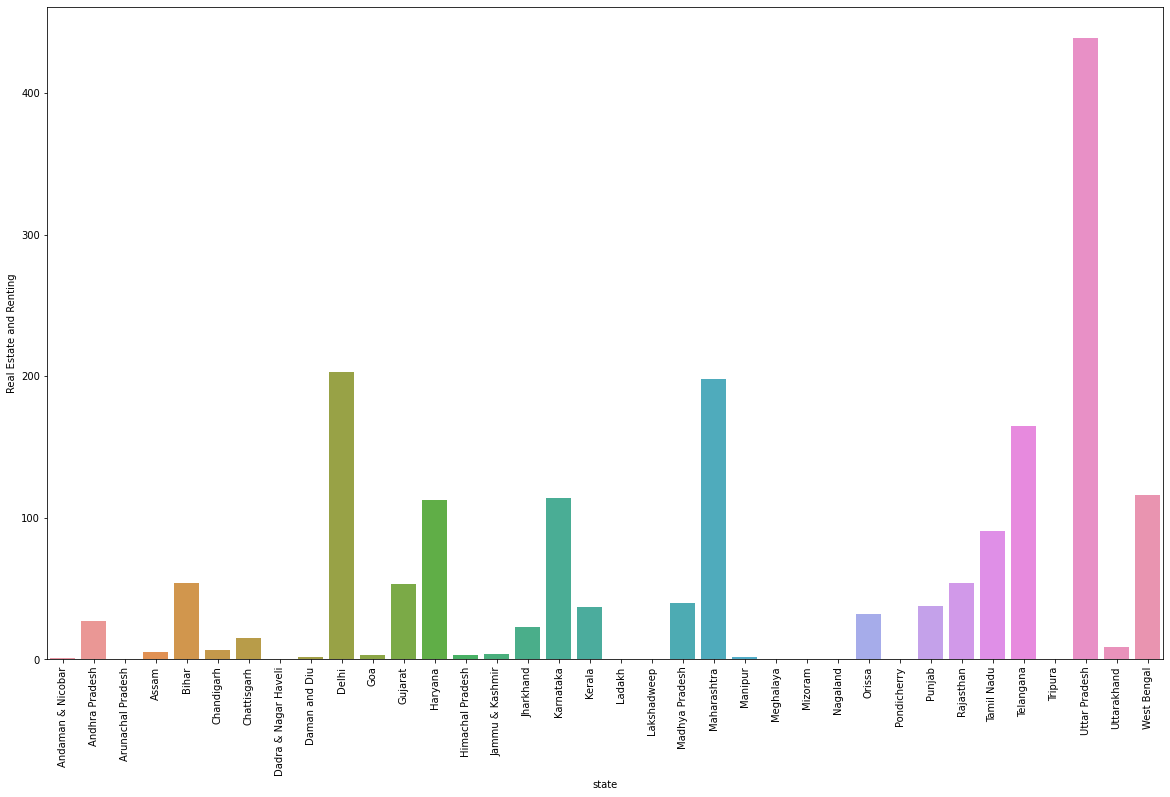

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Real Estate and Renting']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


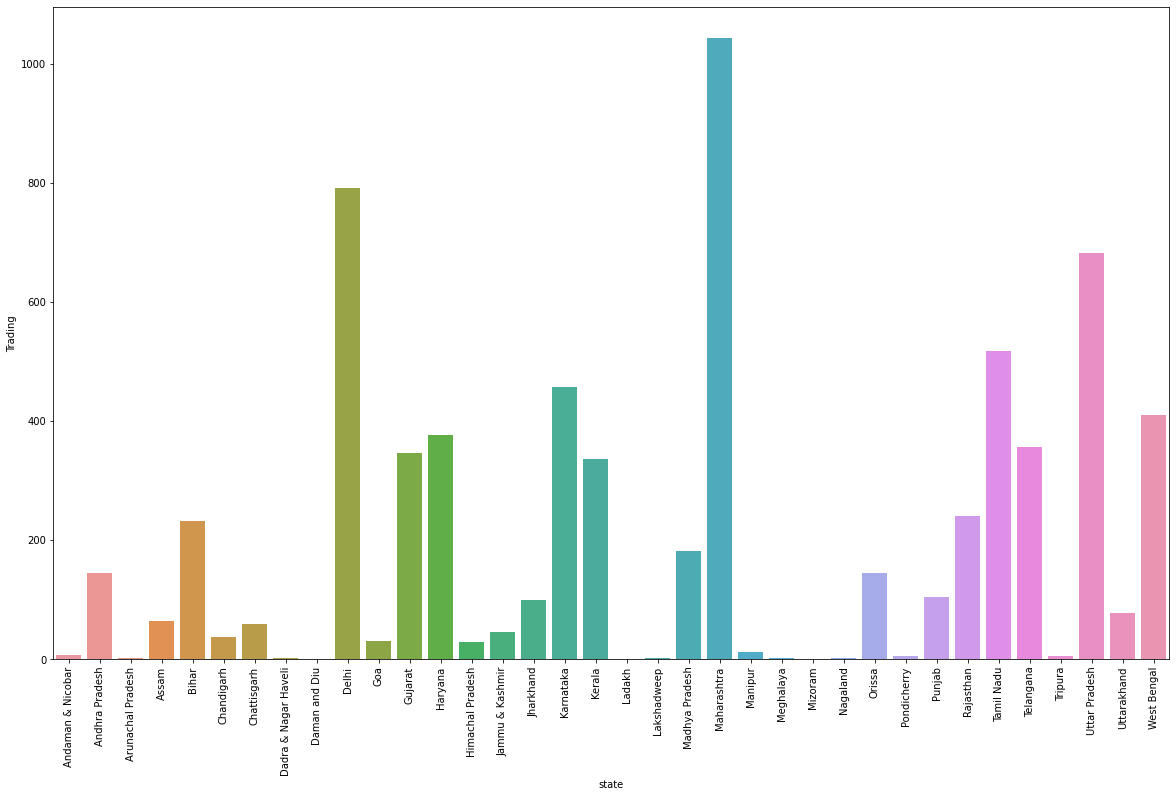

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Trading']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


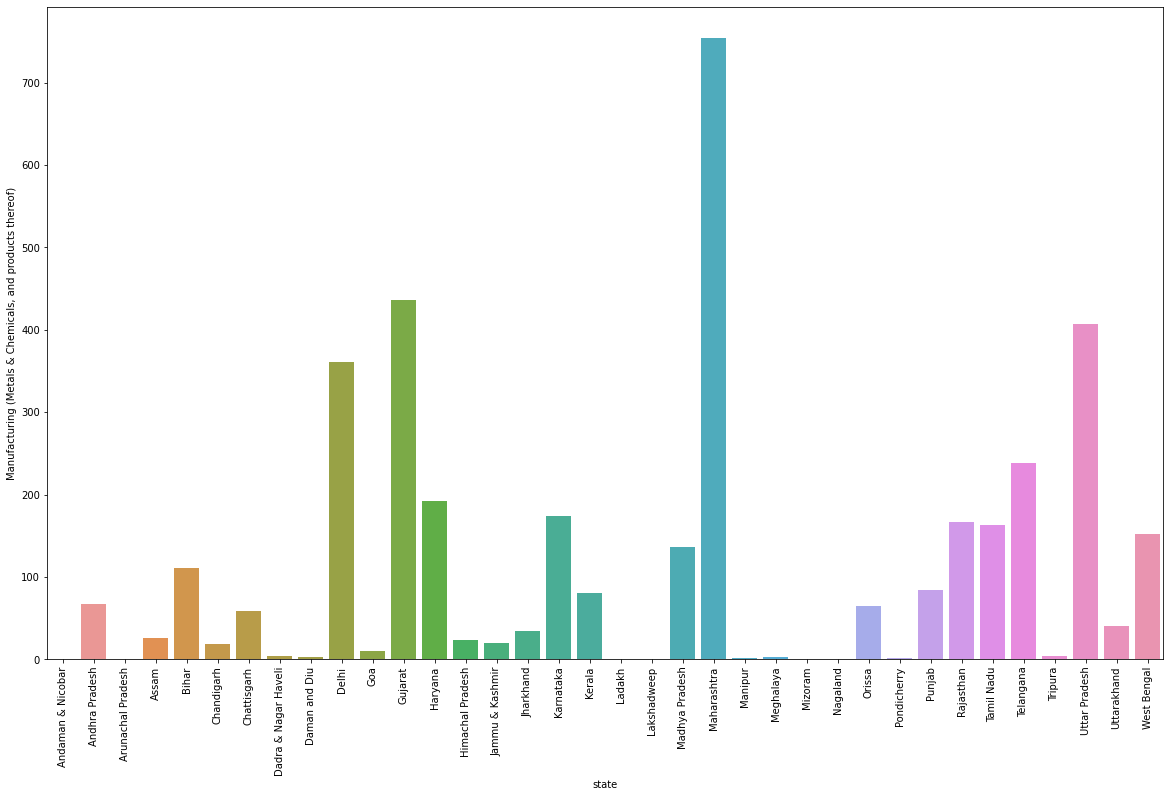

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Metals & Chemicals, and products thereof)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


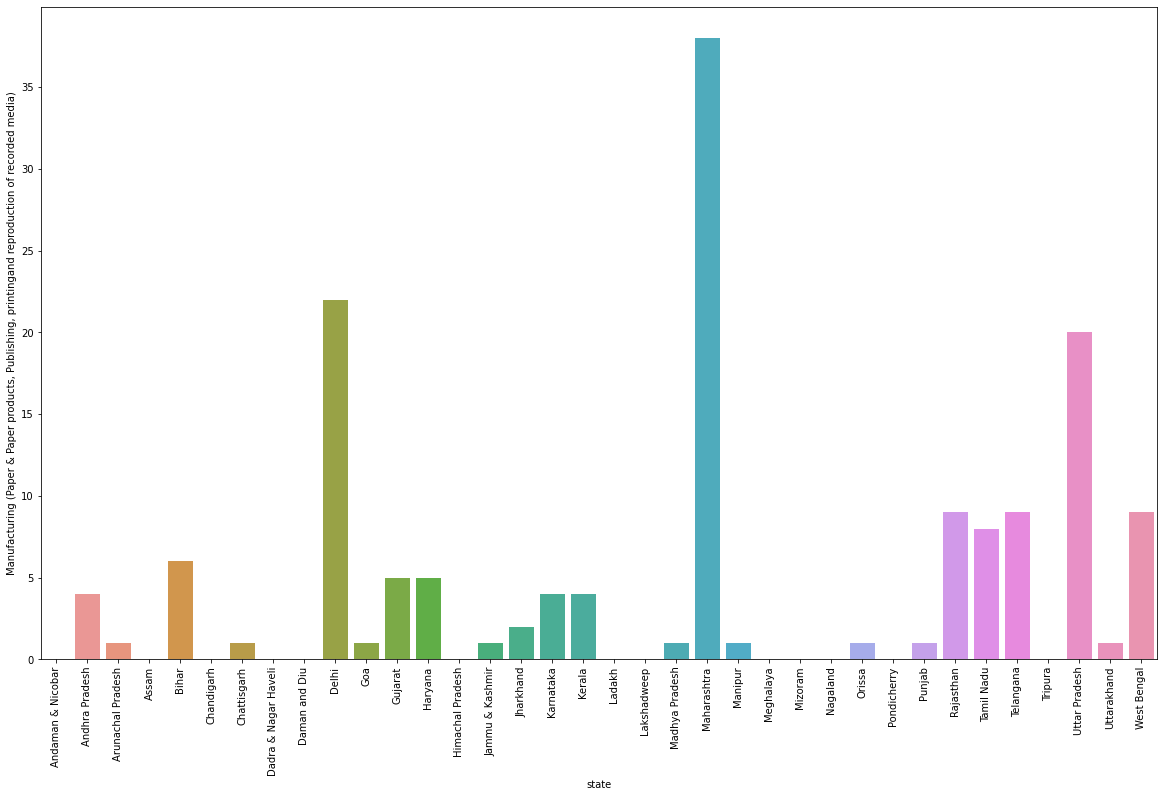

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Paper & Paper products, Publishing, printingand reproduction of recorded media)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


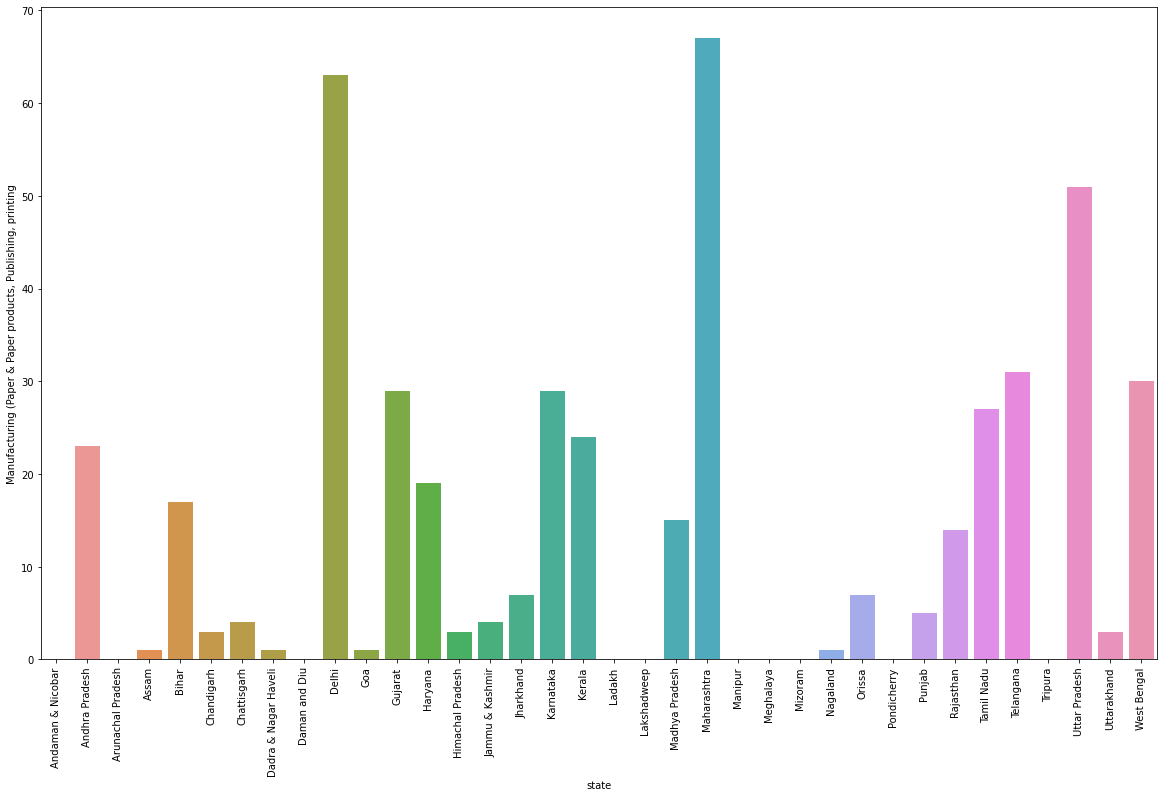

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Paper & Paper products, Publishing, printing']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


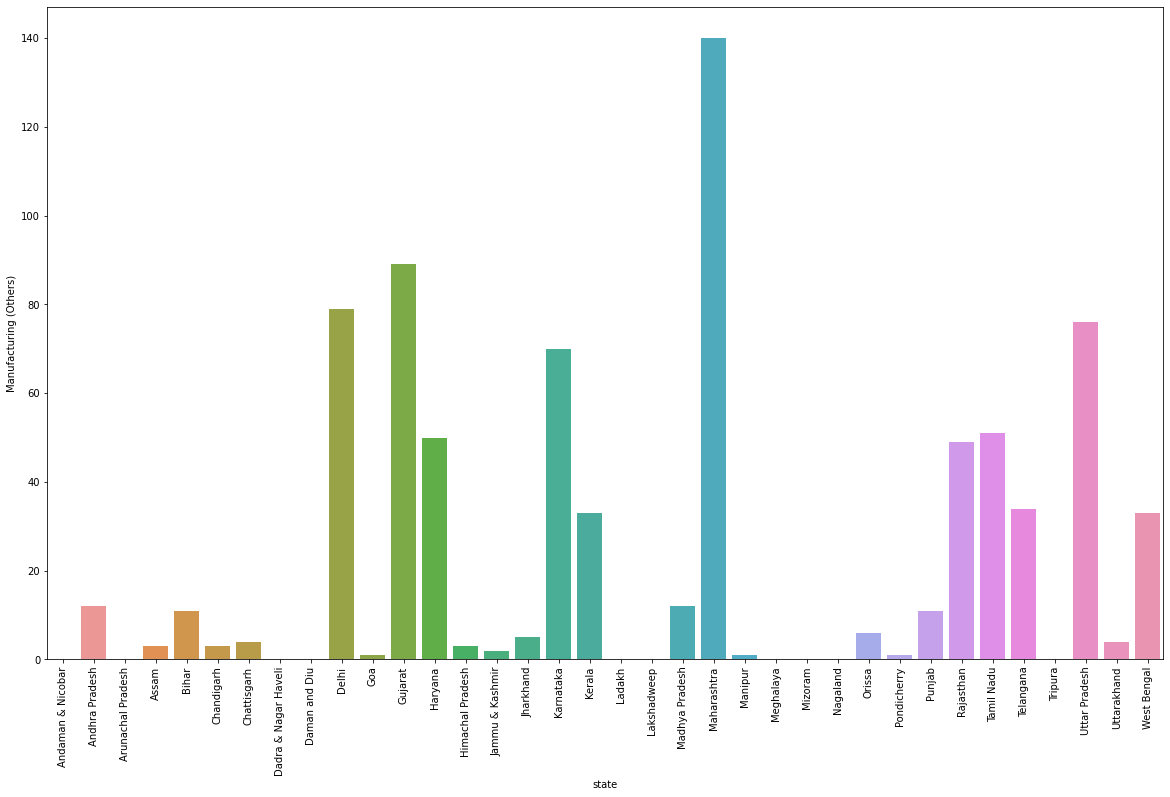

In [ ]:
x= companies_activity['state']
y = companies_activity['activity_code']['Manufacturing (Others)']
plt.figure(figsize=(20,12))
sns.barplot(x, y)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pl=companies_activity.melt('state', var_name='activity_description',  value_name='value')
print(pl)

                 state activity_description  value
0    Andaman & Nicobar                class    NaN
1       Andhra Pradesh                class  120.0
2    Arunachal Pradesh                class    5.0
3                Assam                class   79.0
4                Bihar                class  182.0
..                 ...                  ...    ...
715          Telangana                class   74.0
716            Tripura                class    NaN
717      Uttar Pradesh                class  178.0
718        Uttarakhand                class   22.0
719        West Bengal                class  105.0

[720 rows x 3 columns]


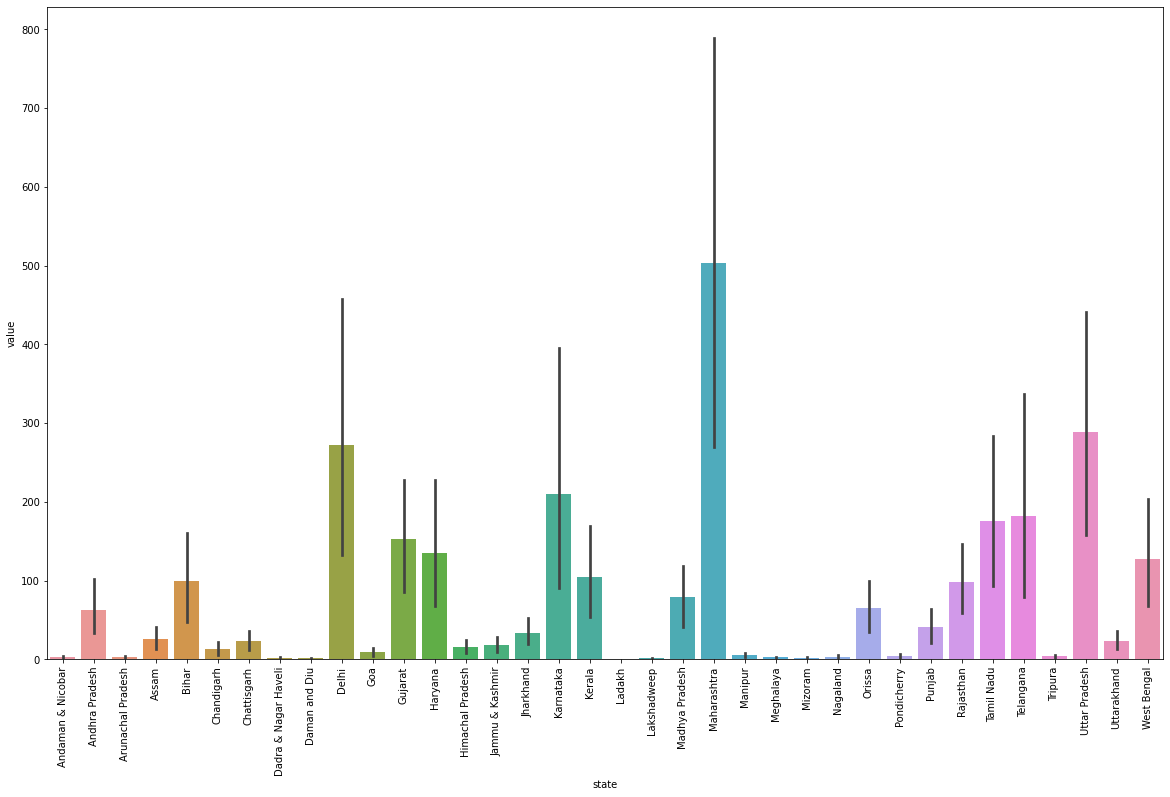

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x="state", y="value", data=pl)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
companies_states=df.pivot_table(index='state',values=['authorized_capital'], aggfunc=np.mean )
companies_states.reset_index(inplace=True)
print(companies_states)

                   state  authorized_capital
0      Andaman & Nicobar        5.540000e+05
1         Andhra Pradesh        8.352973e+05
2      Arunachal Pradesh        7.782609e+05
3                  Assam        1.292843e+06
4                  Bihar        7.654106e+05
5             Chandigarh        7.878182e+05
6            Chattisgarh        1.281950e+06
7   Dadra & Nagar Haveli        5.033333e+06
8          Daman and Diu        4.972727e+06
9                  Delhi        2.472132e+06
10                   Goa        1.056765e+06
11               Gujarat        7.260810e+05
12               Haryana        1.158068e+06
13      Himachal Pradesh        7.431189e+05
14       Jammu & Kashmir        9.800455e+05
15             Jharkhand        1.055890e+06
16             Karnataka        1.609948e+06
17                Kerala        1.089393e+06
18                Ladakh        1.000000e+05
19           Lakshadweep        4.000000e+05
20        Madhya Pradesh        1.480846e+06
21        

In [ ]:
states={ 'Maharashtra':  '1.732642e+06'
,'Telangana': '1.492224e+06'
,'Gujarat': '7.260810e+05'
,'Chandigarh': '7.878182e+05'
,'Delhi': '2.472132e+06'
,'Haryana': '1.158068e+06'
,'Uttar Pradesh': '9.229932e+05'
,'Rajasthan': '5.085687e+05'
,'Chattisgarh': '1.281950e+06'
,'Kerala': '1.089393e+06'
,'West Bengal': '1.598437e+06'
,'Karnataka': '1.609948e+06'
,'Madhya Pradesh': '1.480846e+06'
,'Punjab': '1.020380e+06'
,'Bihar': '7.654106e+05'
,'Manipur': '7.613266e+05'
,'Tamil Nadu': '1.818371e+06'
,'Orissa': '1.033023e+07'
,'Himachal Pradesh': '7.431189e+05'
,'Uttarakhand': '1.956222e+06'
,'Jharkhand': '1.055890e+06'
,'Andhra Pradesh': '8.352973e+05'
,'Goa': '1.056765e+06'
,'Assam': '1.292843e+06'
,'Dadra & Nagar Haveli': '5.033333e+06'
,'Tripura': '2.171026e+06'
,'Jammu & Kashmir': '9.800455e+05'
,'Pondicherry': '8.191837e+05'
,'Mizoram': '1.611500e+07'
,'Nagaland': '8.338095e+05'
,'Andaman & Nicobar': '5.540000e+05'
,'Arunachal Pradesh': '7.782609e+05'
,'Lakshadweep': '4.000000e+05'
,'Meghalaya': '1.638889e+06'
,'Ladakh': '1.000000e+05'
,'Daman and Diu': '4.972727e+06'}

In [ ]:
companies_classes=df.pivot_table(index='category',values=['authorized_capital'], aggfunc=np.mean )
companies_classes.reset_index(inplace=True)
print(companies_classes)

                       category  authorized_capital
0  Company Limited by Guarantee        1.313433e+04
1     Company limited by Shares        1.626939e+06


# **MODELLING**

In [ ]:
hp = pd.read_csv('gdrive/My Drive/2021_registered_companies.csv')



In [ ]:
states={ 'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Ladakh'
,'DD': 'Daman and Diu'}

In [ ]:
hp.replace({'state':states},inplace = True)

In [ ]:
hp.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000.0,102000.0,45309.0,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000.0,3000.0,74994.0,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000.0,500000.0,65990.0,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000.0,10000.0,72900.0,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000.0,500000.0,72900.0,Business Services


In [ ]:
features=['class','category','state','activity_description']
X = hp.loc[:, features]
print(X)

         class                   category            state  \
0      Private  Company limited by Shares        Telangana   
1      Private  Company limited by Shares       Tamil Nadu   
2       Public  Company limited by Shares      Maharashtra   
3      Private  Company limited by Shares        Telangana   
4      Private  Company limited by Shares  Jammu & Kashmir   
...        ...                        ...              ...   
54889  Private  Company limited by Shares       Tamil Nadu   
54890  Private  Company limited by Shares            Delhi   
54891  Private  Company limited by Shares      Maharashtra   
54892  Private  Company limited by Shares          Haryana   
54893  Private  Company limited by Shares            Delhi   

                             activity_description  
0                                    Construction  
1                               Business Services  
2                                         Finance  
3                               Business Servic

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# One-Hot Encoding
ohe = OneHotEncoder()
state_ohe = ohe.fit_transform(hp[['state']])
activity_description_ohe = ohe.fit_transform(hp[['activity_description']])
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = pd.concat([state_ohe, activity_description_ohe], axis=1)
y = hp['authorized_capital']

TypeError: ignored

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = pd.concat([state_ohe, activity_description_ohe], axis=1)
y = hp['authorized_capital']

TypeError: ignored

In [ ]:
activity_descriptions={ 'Agriculture and Allied Activities':  '9.880544e+05'
,'Business Services': '1.037370e+06'
,'Community, personal & Social Services': '7.887027e+05'
,'Construction': '1.206601e+06'
,'Electricity, Gas & Water companies': '1.977200e+07'
,'Manufacturing (Food stuffs)': '1.227045e+06'
,'Manufacturing (Leather & products thereof)': '1.659151e+06'
,'Manufacturing (Machinery & Equipments)': '2.386769e+06'
,'Manufacturing (Metals & Chemicals, and products thereof)': '2.107864e+06'
,'Manufacturing (Others)': '1.766644e+06'
,'Manufacturing (Paper & Paper products, Publishing, printing': '1.221804e+06'
,'Manufacturing (Paper & Paper products, Publishing, printingand reproduction of recorded media)': '5.575000e+05'
,'Manufacturing (Textiles)': '2.136054e+06'
,'Manufacturing (Wood Products)': '2.062287e+06'
,'Mining & Quarrying': '1.578705e+07'
,'Real Estate and Renting': '1.474114e+06'
,'Trading': '1.554811e+06'
,'Transport, storage and Communications': '2.016048e+06'
,'Finance': '1.707549e+06'
,'Insurance': '3.391525e+06'}

In [ ]:
hp.replace({'activity_description':activity_descriptions},inplace = True)
hp.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000.0,102000.0,45309.0,1.206601e+06
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000.0,3000.0,74994.0,1.037370e+06
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000.0,500000.0,65990.0,1.707549e+06
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000.0,10000.0,72900.0,1.037370e+06
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000.0,500000.0,72900.0,1.037370e+06


In [ ]:
classes={ 'Private':  '1.316612e+06'
,'Private(One Person Company)': '3.901501e+05'
,'Public': '1.815323e+07'}

In [ ]:
hp.replace({'class':classes},inplace = True)
hp.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,1.316612e+06,Non-govt company,1500000.0,102000.0,45309.0,1.206601e+06
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,1.316612e+06,Non-govt company,100000.0,3000.0,74994.0,1.037370e+06
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,1.815323e+07,Non-govt company,500000.0,500000.0,65990.0,1.707549e+06
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,1.316612e+06,Non-govt company,1000000.0,10000.0,72900.0,1.037370e+06
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,1.316612e+06,Non-govt company,500000.0,500000.0,72900.0,1.037370e+06


In [ ]:
categories={ 'Company Limited by Guarantee':  '1.313433e+04'
,'Company limited by Shares': '1.626939e+06'}

In [ ]:
hp.replace({'category':categories},inplace = True)
hp.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,1.626939e+06,1.316612e+06,Non-govt company,1500000.0,102000.0,45309.0,1.206601e+06
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,1.626939e+06,1.316612e+06,Non-govt company,100000.0,3000.0,74994.0,1.037370e+06
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,1.626939e+06,1.815323e+07,Non-govt company,500000.0,500000.0,65990.0,1.707549e+06
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,1.626939e+06,1.316612e+06,Non-govt company,1000000.0,10000.0,72900.0,1.037370e+06
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,1.626939e+06,1.316612e+06,Non-govt company,500000.0,500000.0,72900.0,1.037370e+06


In [ ]:
states={ 'Maharashtra':  '1.732642e+06'
,'Telangana': '1.492224e+06'
,'Gujarat': '7.260810e+05'
,'Chandigarh': '7.878182e+05'
,'Delhi': '2.472132e+06'
,'Haryana': '1.158068e+06'
,'Uttar Pradesh': '9.229932e+05'
,'Rajasthan': '5.085687e+05'
,'Chattisgarh': '1.281950e+06'
,'Kerala': '1.089393e+06'
,'West Bengal': '1.598437e+06'
,'Karnataka': '1.609948e+06'
,'Madhya Pradesh': '1.480846e+06'
,'Punjab': '1.020380e+06'
,'Bihar': '7.654106e+05'
,'Manipur': '7.613266e+05'
,'Tamil Nadu': '1.818371e+06'
,'Orissa': '1.033023e+07'
,'Himachal Pradesh': '7.431189e+05'
,'Uttarakhand': '1.956222e+06'
,'Jharkhand': '1.055890e+06'
,'Andhra Pradesh': '8.352973e+05'
,'Goa': '1.056765e+06'
,'Assam': '1.292843e+06'
,'Dadra & Nagar Haveli': '5.033333e+06'
,'Tripura': '2.171026e+06'
,'Jammu & Kashmir': '9.800455e+05'
,'Pondicherry': '8.191837e+05'
,'Mizoram': '1.611500e+07'
,'Nagaland': '8.338095e+05'
,'Andaman & Nicobar': '5.540000e+05'
,'Arunachal Pradesh': '7.782609e+05'
,'Lakshadweep': '4.000000e+05'
,'Meghalaya': '1.638889e+06'
,'Ladakh': '1.000000e+05'
,'Daman and Diu': '4.972727e+06'}

In [ ]:
hp.replace({'state':states},inplace = True)
hp.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,1.492224e+06,RoC-Hyderabad,1.626939e+06,1.316612e+06,Non-govt company,1500000.0,102000.0,45309.0,1.206601e+06
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,1.818371e+06,RoC-Chennai,1.626939e+06,1.316612e+06,Non-govt company,100000.0,3000.0,74994.0,1.037370e+06
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,1.732642e+06,RoC-Pune,1.626939e+06,1.815323e+07,Non-govt company,500000.0,500000.0,65990.0,1.707549e+06
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,1.492224e+06,RoC-Hyderabad,1.626939e+06,1.316612e+06,Non-govt company,1000000.0,10000.0,72900.0,1.037370e+06
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,9.800455e+05,RoC-Jammu,1.626939e+06,1.316612e+06,Non-govt company,500000.0,500000.0,72900.0,1.037370e+06


In [ ]:
hp = hp.astype({'activity_description' : float,'state' : float})
hp = hp.astype({'class' : float,'category' : float})
print(hp.dtypes)

company_uid              object
date_of_registration     object
month_name               object
state                   float64
roc                      object
category                float64
class                   float64
company_type             object
authorized_capital      float64
paidup_capital          float64
activity_code           float64
activity_description    float64
dtype: object


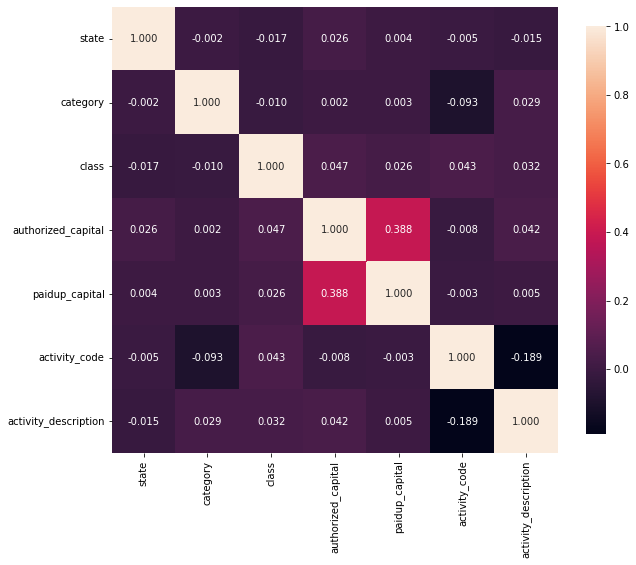

In [ ]:
rel = hp.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(rel, vmax=1.0, fmt='.3f',square=True, annot=True, cbar_kws={"shrink": 0.75})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
features=['class','category','state','activity_description']
X = hp.loc[:, features]
print(X)

            class   category      state  activity_description
0       1316612.0  1626939.0  1492224.0             1206601.0
1       1316612.0  1626939.0  1818371.0             1037370.0
2      18153230.0  1626939.0  1732642.0             1707549.0
3       1316612.0  1626939.0  1492224.0             1037370.0
4       1316612.0  1626939.0   980045.5             1037370.0
...           ...        ...        ...                   ...
54889   1316612.0  1626939.0  1818371.0             1227045.0
54890   1316612.0  1626939.0  2472132.0             1037370.0
54891   1316612.0  1626939.0  1732642.0             2062287.0
54892   1316612.0  1626939.0  1158068.0             2386769.0
54893   1316612.0  1626939.0  2472132.0             1659151.0

[54894 rows x 4 columns]


In [ ]:
target=['authorized_capital']
y = hp.loc[:, target]
print(y)

       authorized_capital
0               1500000.0
1                100000.0
2                500000.0
3               1000000.0
4                500000.0
...                   ...
54889            100000.0
54890            500000.0
54891            500000.0
54892            500000.0
54893            500000.0

[54894 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41170, 4) (13724, 4) (41170, 1) (13724, 1)


In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [ ]:
R2=r2_score(y_test, y_pred)
print('R2 value: ',R2)

R2 value:  0.005020532044516912
